> **在数据分析中，对数据的聚合以及可视化是必不可少的一个环节**

这个项目练习我们来看下练习下数据聚合以及可视化的一些操作。这里有一份关于小费的数据，我们通过这份数据来完成以下需求：

- 统计不同time的tip的均值，方差
- 将total_bill和tip根据不同的sex进行标准化
- 计算吸烟者和非吸烟者的给出小费比例值的均值
- 对time和size聚合，画出total_bill 的饼图

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
tips  = pd.read_csv("../data/tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 统计不同time的tip的均值，方差

均值和方差就不用解释啥意思了吧，直接开干吧~

In [3]:
grouped = tips.groupby("time")["tip"]

In [4]:
# 不同时间的小费的均值
grouped.mean()

time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64

很明显，晚餐给的小费平均值高于午餐，可能是因为大家晚上吃饭时更豪爽吧，又或许是别的不可告人的原因，哈哈~。

再来看看不同时间的小费的方差吧。

In [5]:
# 不同时间的小费的方差
grouped.var()

time
Dinner    2.062793
Lunch     1.452857
Name: tip, dtype: float64

结果显示，晚餐的的小费方差一样很高，结合晚餐的平均值高于午餐这一事实，这充分说明了晚餐给的小费虽然平均值高，但是非常不稳定，难道是因为晚上的人消费都非常冲动么？哈哈哈~

## 将total_bill和tip根据不同的sex进行标准化

这个说的意思就是根据不同sex进行分组，然后将对每种sex下的 total_bill 和 tip 进行标准化。

标准化的方式有很多，这里我们选择方式为：

$$\frac{x - mean}{std}$$

In [6]:
grouped = tips.groupby("sex")["total_bill","tip"]

tips_standardization = grouped.transform(lambda arr: (arr - arr.mean())/arr.std()).join(tips["sex"])
tips_standardization.head()

,total_bill,tip,sex
0,-0.133209,-1.572623,Female
1,-1.125195,-0.960054,Male
2,0.028759,0.275590,Male
3,0.317518,0.147997,Male
4,0.815699,0.669733,Female


## 计算吸烟者和非吸烟者的给出小费比例值的均值

这话比较绕，实际上就是想看下吸烟者和非吸烟者哪个给出的小费比例值的均值。

In [7]:
# 计算小费比例值
tips["tips_rating"] = tips.tip / tips.total_bill

tips.groupby("smoker")["tips_rating"].mean()

smoker
No     0.159328
Yes    0.163196
Name: tips_rating, dtype: float64

可以看出，吸烟的人给出的小费比例值比非吸烟的人高，这说明了什么，自己脑补下~

## 对time和size聚合得到均值，画出total_bill 的饼图

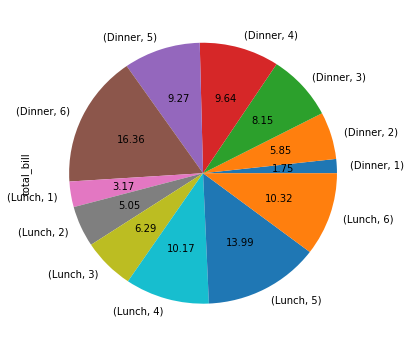

In [9]:
tips.groupby(["time","size"])["total_bill"].mean().plot(kind="pie", figsize=(6, 6),autopct="%.2f")

可视化之后，是不是一下子清晰了不少，可以看到，当午饭且人数为2时，平均消费的金额最多。